In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [58]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [6]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [7]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [8]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga'],
             'penalty':['l2']} 


grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='f1_weighted', verbose=3)

In [12]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)

# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)

In [13]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'penalty': 'l2', 'solver': 'liblinear'}: 0.8794289739855382


In [14]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[79  6]
 [10 39]]


In [15]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        85
           1       0.87      0.80      0.83        49

    accuracy                           0.88       134
   macro avg       0.88      0.86      0.87       134
weighted avg       0.88      0.88      0.88       134



In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])

0.9507803121248499

In [21]:
table=pd.DataFrame.from_dict(re)

In [22]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078856,0.002308,0.005229,0.002199,l2,newton-cg,"{'penalty': 'l2', 'solver': 'newton-cg'}",0.799620,0.811321,0.68205,0.92351,0.922185,0.827737,0.089864,2
1,0.033190,0.024043,0.004935,0.002126,l2,lbfgs,"{'penalty': 'l2', 'solver': 'lbfgs'}",0.799620,0.811321,0.68205,0.92351,0.922185,0.827737,0.089864,2
2,0.004056,0.001330,0.006222,0.000406,l2,liblinear,"{'penalty': 'l2', 'solver': 'liblinear'}",0.804764,0.811321,0.68205,0.92351,0.922185,0.828766,0.089565,1
3,0.003452,0.000818,0.005282,0.000925,l2,saga,"{'penalty': 'l2', 'solver': 'saga'}",0.799620,0.811321,0.68205,0.92351,0.922185,0.827737,0.089864,2


In [67]:
age_input=int(input("Age:"))
Estimated_salary=float(input("Estimated Salary:"))
Gender=int(input("Gender Male 1 or Female 0:"))

Age: 10
Estimated Salary: 30000
Gender Male 1 or Female 0: 1


In [68]:
Future_Prediction=grid.predict([[age_input,Estimated_salary,Gender]])# change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[1]


Fitting 5 folds for each of 4 candidates, totalling 20 fits
The confusion Matrix:
 [[79  6]
 [10 39]]
The report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        85
           1       0.87      0.80      0.83        49

    accuracy                           0.88       134
   macro avg       0.88      0.86      0.87       134
weighted avg       0.88      0.88      0.88       134

ROC-AUC Score: 0.9507803121248499


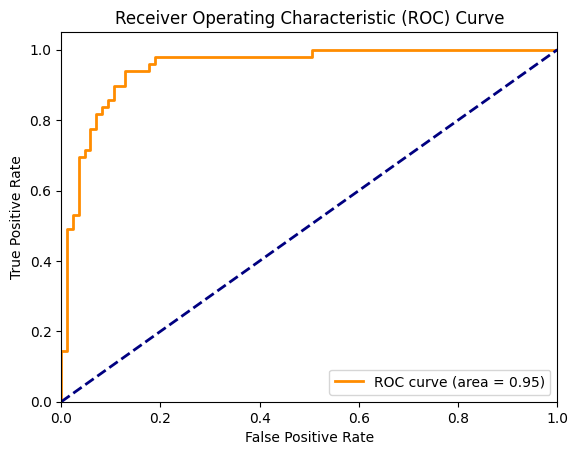

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Load the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.get_dummies(dataset, dtype=int, drop_first=True)

# Select features and target variable
indep = dataset[['Age', 'EstimatedSalary', 'Gender_Male']]
dep = dataset['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=1/3, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the parameter grid for grid search
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'penalty': ['l2']}

# Initialize the grid search with Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3, n_jobs=-1, scoring='f1_weighted')

# Fit the model for grid search
grid.fit(X_train, y_train)

# Predictions on the test set
grid_predictions = grid.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, grid_predictions)

# Classification report
clf_report = classification_report(y_test, grid_predictions)
print("The confusion Matrix:\n", cm)
print("The report:\n", clf_report)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr,_ = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()